In [1]:
from google.colab import  drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
!ls '/gdrive/MyDrive/Calisma_ortami/'

 aprioriAlgorithm.ipynb			  merc.xlsx
 apyori.py				  MNIST_YSA.ipynb
 aylaragoresatislar.csv			  modelBasarisi.ipynb
 Belge.csv				 'PCA&LDA_Boyut_Indirgeme.ipynb'
 Cesitli_Tahminleme_Yontemleri.ipynb	  rakamtanima_cnn.py
 Churn_Modelling.csv			  sepet.csv
 ClusterAlgorithms.ipynb		  sepet.xlsx
 Colab_Calisma_Ortami.ipynb		  TensorflowArabaAnalizi.ipynb
 eksik_veriler.csv			  TensorflowSiniflandira.ipynb
 imputerOrnegi.ipynb			  TEZ-KESİNTİ
 Iris_Veri_Kumesi.ipynb			  veri.csv
 Iris.xls				  veri_iyilestirme.ipynb
 kesinti.ipynb				  veriler.csv
 LinearRegession_havaDurumuTahmin.ipynb   wine.csv
 LogisticRegressionSiniflama.ipynb	  yeni_maaslar.csv
 maliciousornot.xlsx			  YSA.ipynb


# Model Başarısını Ölçme

In [3]:
!pip install statsmodels
import statsmodels

In [4]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataFrame = pd.read_csv('/gdrive/MyDrive/Calisma_ortami/eksik_veriler.csv')
dataFrame

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


## Preprocessing - Veriyi Ön İşleme Süreci

In [9]:
from sklearn import preprocessing
labelEncoding= preprocessing.LabelEncoder()

In [10]:
gender= dataFrame.iloc[:,-1].values
gender

array(['e', 'e', 'k', 'k', 'e', 'e', 'e', 'e', 'k', 'e', 'k', 'k', 'k',
       'k', 'k', 'e', 'e', 'e', 'e', 'k', 'k', 'k'], dtype=object)

## Transforming - Veriyi transform Etme

In [11]:
gender= labelEncoding.fit_transform(gender)
gender

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

## Ön İşleme İle Dönüşen ve Transform Edilen Veriyi DF' tekrar kaydetme

In [12]:
dataFrame.drop("cinsiyet", axis=1, inplace=True)


In [13]:
dataFrame["Cinsiyet"]= gender

In [14]:
dataFrame

,ulke,boy,kilo,yas,Cinsiyet
0,tr,130,30,10.0,0
1,tr,125,36,11.0,0
2,tr,135,34,10.0,1
3,tr,133,30,9.0,1
4,tr,129,38,12.0,0
5,tr,180,90,30.0,0
6,tr,190,80,25.0,0
7,tr,175,90,35.0,0
8,tr,177,60,22.0,1
9,us,185,105,33.0,0


In [15]:
countries= dataFrame.iloc[:, 0:1].values
countries.shape

(22, 1)

In [16]:
oneHotEncoding= preprocessing.OneHotEncoder()

In [18]:
countries = oneHotEncoding.fit_transform(countries).toarray()

In [19]:
type(countries)

numpy.ndarray

In [20]:
dataFrame.drop("ulke", axis=1, inplace=True)

In [24]:
countryDF= pd.DataFrame(countries, columns=["TR","USA","FR"])

ValueError: Shape of passed values is (22, 6), indices imply (22, 3)

In [25]:
sonucDF= pd.concat([countryDF,dataFrame], axis=1)

NameError: name 'countryDF' is not defined

In [22]:
sonucDF

NameError: name 'sonucDF' is not defined

## Boş Verilerin Kontrolü

In [23]:
sonucDF.isnull()

NameError: name 'sonucDF' is not defined

In [ ]:
sonucDF.isnull().sum()

TR          0
USA         0
FR          0
boy         0
kilo        0
yas         2
Cinsiyet    0
dtype: int64

In [ ]:
sonucDF.mean()

TR            0.318182
USA           0.409091
FR            0.272727
boy         163.363636
kilo         62.136364
yas          28.450000
Cinsiyet      0.500000
dtype: float64

In [ ]:
sonucDF

,TR,USA,FR,boy,kilo,yas,Cinsiyet
0,0.0,1.0,0.0,130,30,10.0,0
1,0.0,1.0,0.0,125,36,11.0,0
2,0.0,1.0,0.0,135,34,10.0,1
3,0.0,1.0,0.0,133,30,9.0,1
4,0.0,1.0,0.0,129,38,12.0,0
5,0.0,1.0,0.0,180,90,30.0,0
6,0.0,1.0,0.0,190,80,25.0,0
7,0.0,1.0,0.0,175,90,35.0,0
8,0.0,1.0,0.0,177,60,22.0,1
9,0.0,0.0,1.0,185,105,33.0,0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer= SimpleImputer(missing_values=np.nan, strategy= "mean")

In [ ]:
Yas= sonucDF.iloc[:, 3:6].values
Yas[:,0:3]

array([[130.,  30.,  10.],
       [125.,  36.,  11.],
       [135.,  34.,  10.],
       [133.,  30.,   9.],
       [129.,  38.,  12.],
       [180.,  90.,  30.],
       [190.,  80.,  25.],
       [175.,  90.,  35.],
       [177.,  60.,  22.],
       [185., 105.,  33.],
       [165.,  55.,  27.],
       [155.,  50.,  44.],
       [160.,  58.,  nan],
       [162.,  59.,  41.],
       [167.,  62.,  55.],
       [174.,  70.,  47.],
       [193.,  90.,  nan],
       [187.,  80.,  27.],
       [183.,  88.,  28.],
       [159.,  40.,  29.],
       [164.,  66.,  32.],
       [166.,  56.,  42.]])

In [ ]:
imputer = imputer.fit(Yas[:,0:3])
SimpleImputer()
Yas[:,0:3] = imputer.transform(Yas[:,0:3])
yasDF= pd.DataFrame(Yas, columns= ["BOY", "KİLO", "YAS"])
yasDF

,BOY,KİLO,YAS
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [ ]:
sonDF= pd.concat([sonucDF,yasDF],axis=1)

In [ ]:
sonDF.drop(["boy"	, "kilo"	,"yas"], axis=1, inplace=True)

In [ ]:
sonDF

,TR,USA,FR,Cinsiyet,BOY,KİLO,YAS
0,0.0,1.0,0.0,0,130.0,30.0,10.00
1,0.0,1.0,0.0,0,125.0,36.0,11.00
2,0.0,1.0,0.0,1,135.0,34.0,10.00
3,0.0,1.0,0.0,1,133.0,30.0,9.00
4,0.0,1.0,0.0,0,129.0,38.0,12.00
5,0.0,1.0,0.0,0,180.0,90.0,30.00
6,0.0,1.0,0.0,0,190.0,80.0,25.00
7,0.0,1.0,0.0,0,175.0,90.0,35.00
8,0.0,1.0,0.0,1,177.0,60.0,22.00
9,0.0,0.0,1.0,0,185.0,105.0,33.00


<Axes: >

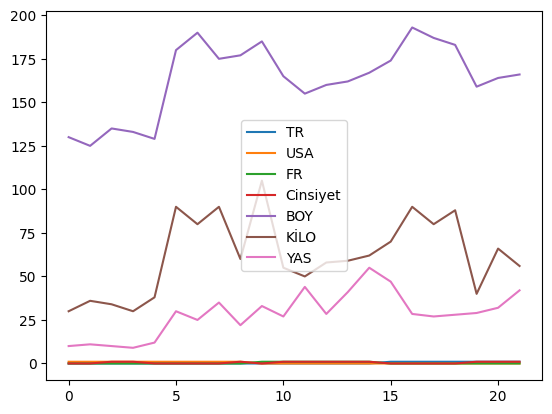

In [ ]:
sonDF.plot()

## Yatayda ve Dikeyde Veriyi Seçip Bölme

In [26]:
x=  sonDF.drop("BOY", axis=1).values
y = sonDF["BOY"].values
type(x)

NameError: name 'sonDF' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

## Veriyi Ön İşleme ve Ölçeklendirme

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression= LinearRegression()

In [ ]:
regression_train = regression.fit(x_train, y_train)

In [ ]:
regressiont_test = regression.fit(x_test, y_test)

In [ ]:
y_test_peredict= regression_train.predict(x_test)

In [ ]:
import statsmodels.api as sm

In [ ]:
xDF= pd.DataFrame(x, columns= ["TR",	"USA",	"FR",	"CINSIYET", "KILO",	"YAS"])

In [ ]:
yDF= pd.DataFrame(y)

In [ ]:
X= np.append(arr= np.ones((22,1)).astype(int), values= xDF, axis=1)
X

array([[  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  30.  ,  10.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  36.  ,  11.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   1.  ,  34.  ,  10.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   1.  ,  30.  ,   9.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  38.  ,  12.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  30.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  80.  ,  25.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  35.  ],
       [  1.  ,   0.  ,   1.  ,   0.  ,   1.  ,  60.  ,  22.  ],
       [  1.  ,   0.  ,   0.  ,   1.  ,   0.  , 105.  ,  33.  ],
       [  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,  55.  ,  27.  ],
       [  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,  50.  ,  44.  ],
       [  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,  58.  ,  28.45],
       [  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,  59.  ,  41.  ],
       [  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,  62.  ,  55.  ],
       [  1.  ,   1.  ,  

In [ ]:
X_l = xDF.iloc[:, [0,1,2,3,4,5]].values

In [ ]:
X_l.astype(float)

array([[  0.  ,   1.  ,   0.  ,   0.  ,  30.  ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  36.  ,  11.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  34.  ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  30.  ,   9.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  38.  ,  12.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  30.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  80.  ,  25.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  35.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  60.  ,  22.  ],
       [  0.  ,   0.  ,   1.  ,   0.  , 105.  ,  33.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  55.  ,  27.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  50.  ,  44.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  58.  ,  28.45],
       [  0.  ,   0.  ,   1.  ,   1.  ,  59.  ,  41.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  62.  ,  55.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,  70.  ,  47.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,  90.  ,  28.45],
       [  1.  ,   0.  ,   0.  ,

In [ ]:
X_l = np.array(X_l, dtype= float)

In [ ]:
X_l

array([[  0.  ,   1.  ,   0.  ,   0.  ,  30.  ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  36.  ,  11.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  34.  ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  30.  ,   9.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  38.  ,  12.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  30.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  80.  ,  25.  ],
       [  0.  ,   1.  ,   0.  ,   0.  ,  90.  ,  35.  ],
       [  0.  ,   1.  ,   0.  ,   1.  ,  60.  ,  22.  ],
       [  0.  ,   0.  ,   1.  ,   0.  , 105.  ,  33.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  55.  ,  27.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  50.  ,  44.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  58.  ,  28.45],
       [  0.  ,   0.  ,   1.  ,   1.  ,  59.  ,  41.  ],
       [  0.  ,   0.  ,   1.  ,   1.  ,  62.  ,  55.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,  70.  ,  47.  ],
       [  1.  ,   0.  ,   0.  ,   0.  ,  90.  ,  28.45],
       [  1.  ,   0.  ,   0.  ,

In [ ]:
model= sm.OLS(y,X_l).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     24.85
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           5.17e-07
Time:                        17:38:57   Log-Likelihood:                -73.887
No. Observations:                  22   AIC:                             159.8
Df Residuals:                      16   BIC:                             166.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.1282      9.867     10.451      0.0

In [ ]:
X_l = xDF.iloc[:, [0,1,2,3,4]].values
X_l = np.array(X_l, dtype= float)
model= sm.OLS(y,X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.32e-08
Time:                        17:38:57   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           104.5490      9.193     11.373      0.0

In [ ]:
X_l = xDF.iloc[:, [0,1,2,4]].values
X_l = np.array(X_l, dtype= float)
model= sm.OLS(y,X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     33.16
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.52e-07
Time:                        17:38:57   Log-Likelihood:                -77.131
No. Observations:                  22   AIC:                             162.3
Df Residuals:                      18   BIC:                             166.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           119.8136      7.265     16.491      0.0